# Explainable Machine Learning for Parkinson’s Disease Detection Using Vocal Biomarkers

# Prepare Data

## Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,precision_score, f1_score, roc_auc_score
from sklearn.tree import plot_tree
from scipy.stats import mode


import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/content/parkinsons.data')

In [9]:
print(df.shape)
print(df.info())
df.head()

(195, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Statistical Summary

In [10]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## Missing values

In [11]:
df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


## Drop name column

In [12]:
df.drop(columns='name',inplace=True)

## Histgram

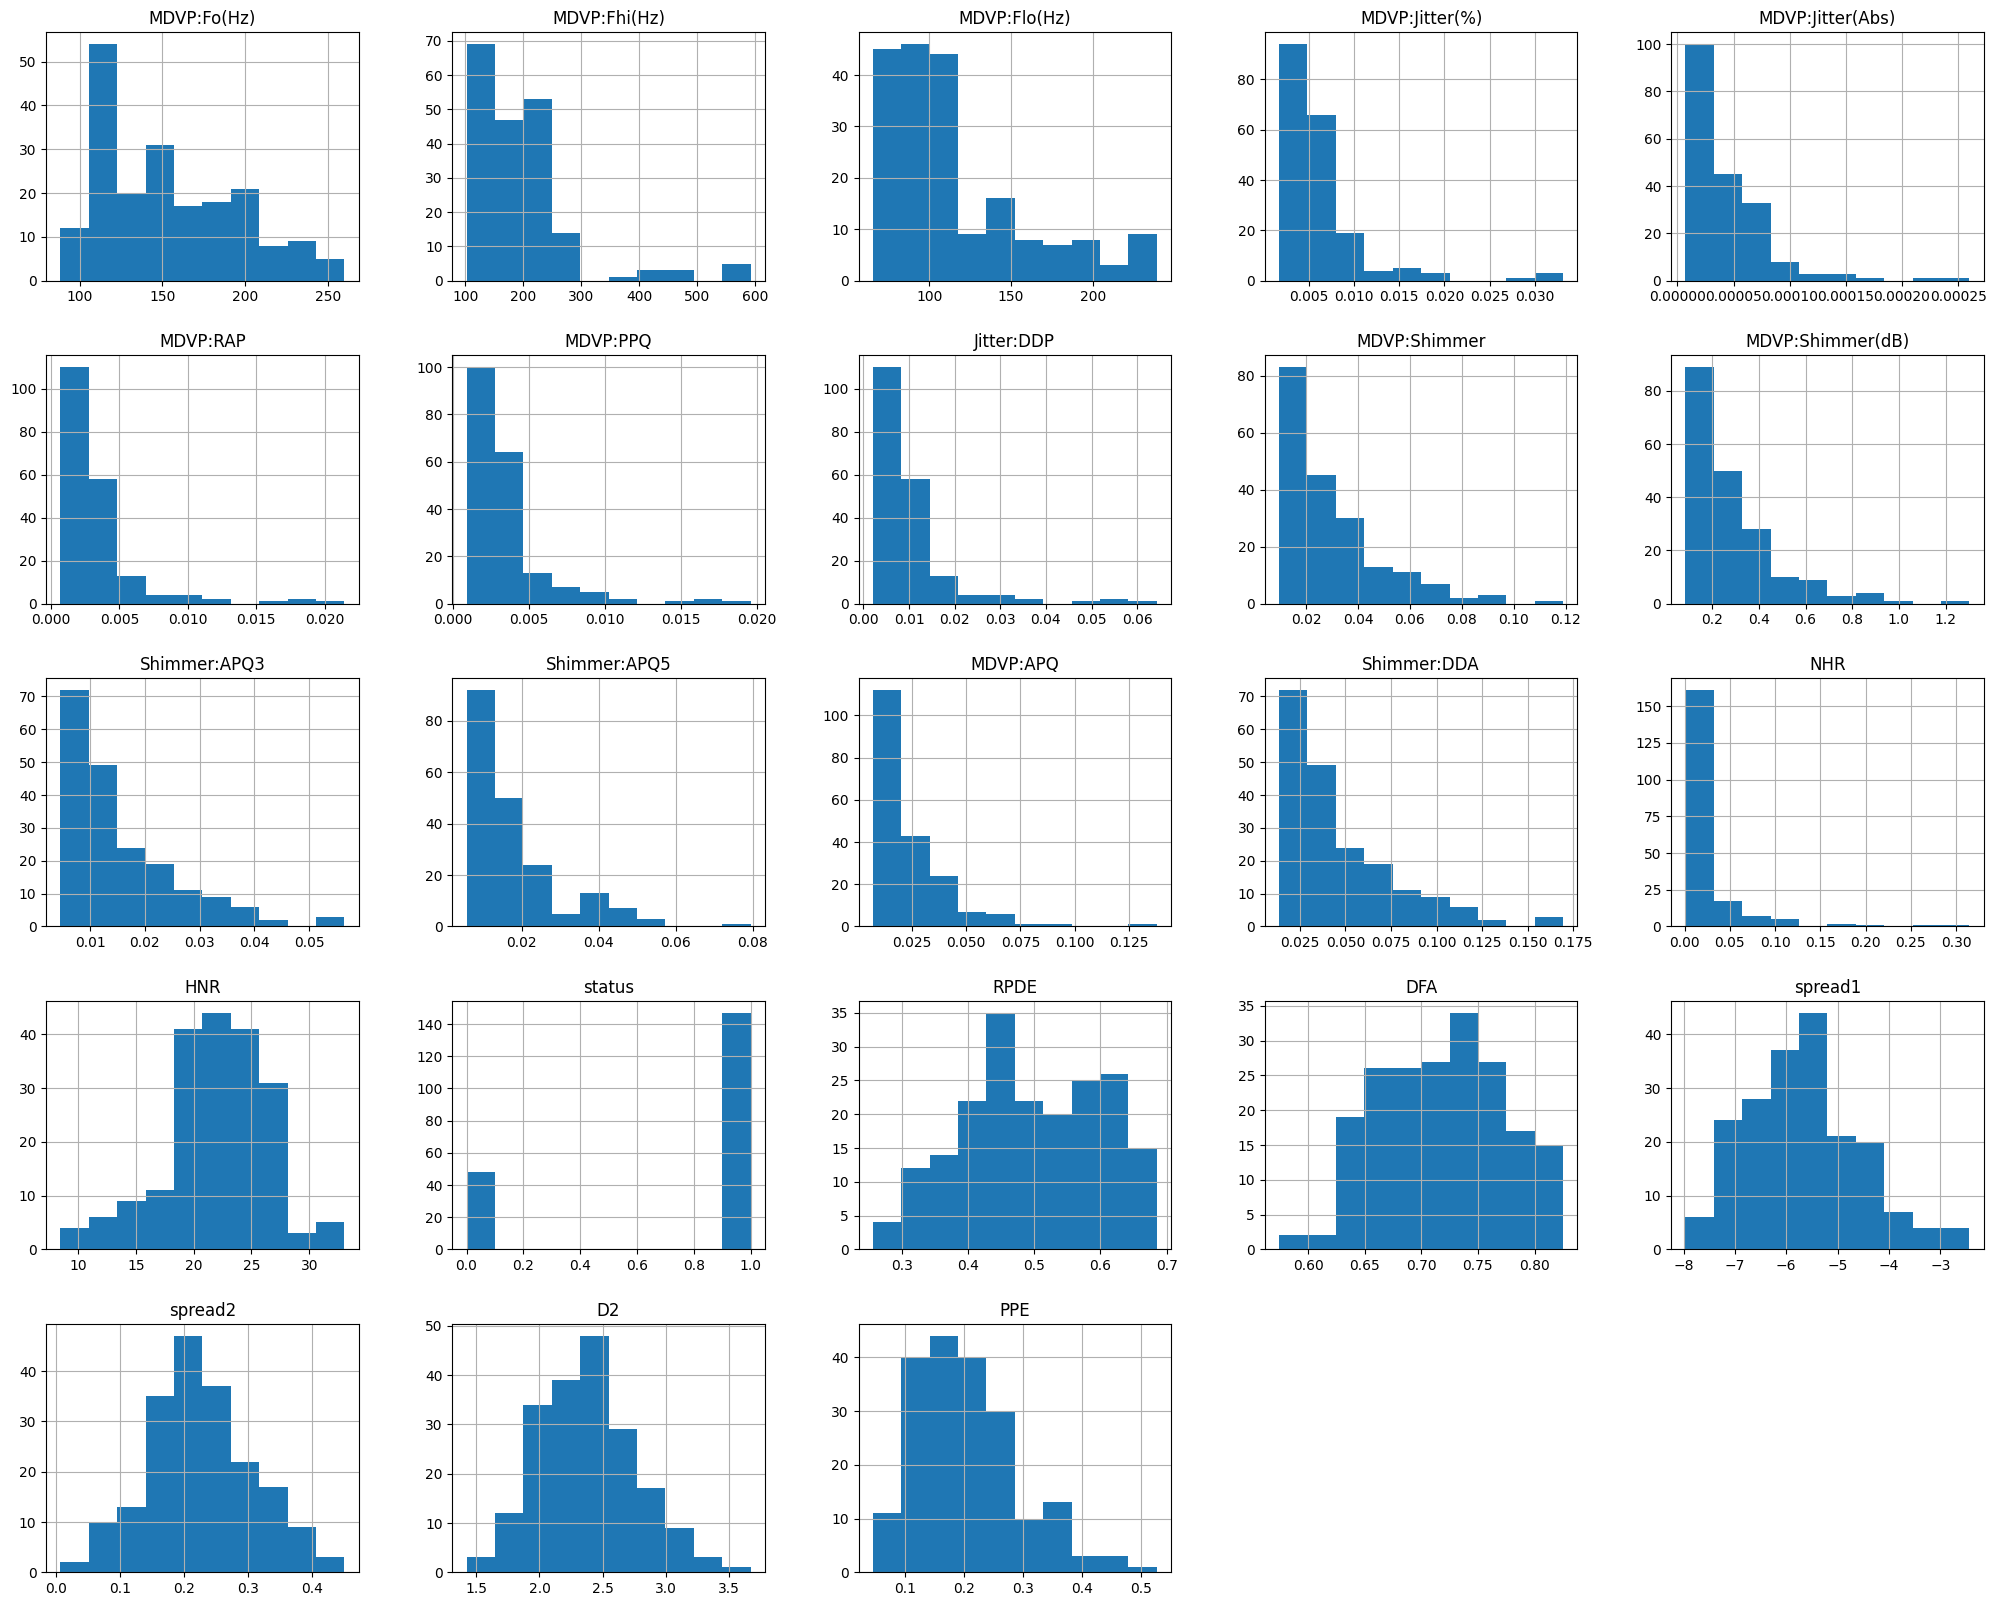

In [13]:
df.hist(figsize=(25,20));

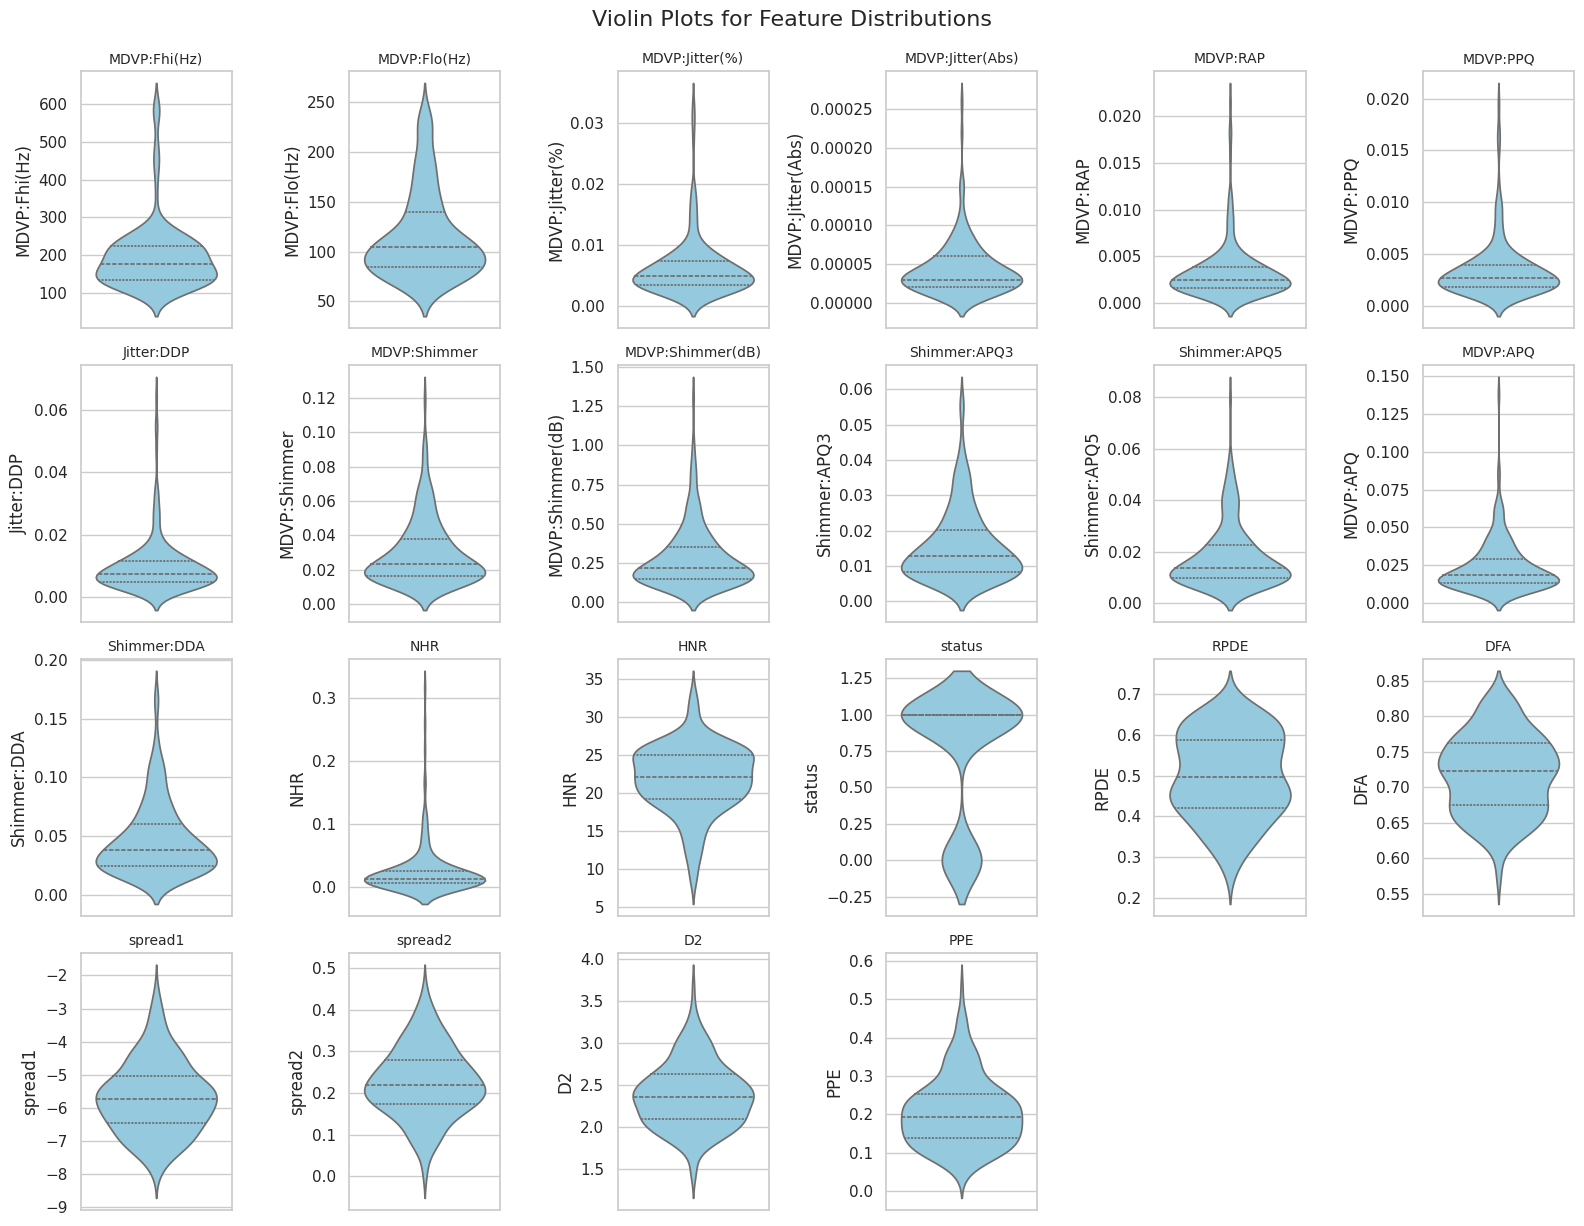

In [44]:
# Set up the figure size and style
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

features = df.columns[1:]

# Loop through features and create a violin plot for each
for i, feature in enumerate(features, 1):
    plt.subplot(4, int(np.ceil(len(features)/4)), i)
    sns.violinplot(y=df[feature], color="skyblue", inner="quartile")
    plt.title(feature, fontsize=10)
    plt.xlabel('')
    plt.tight_layout()

plt.suptitle("Violin Plots for Feature Distributions", fontsize=16, y=1.02)
plt.show()

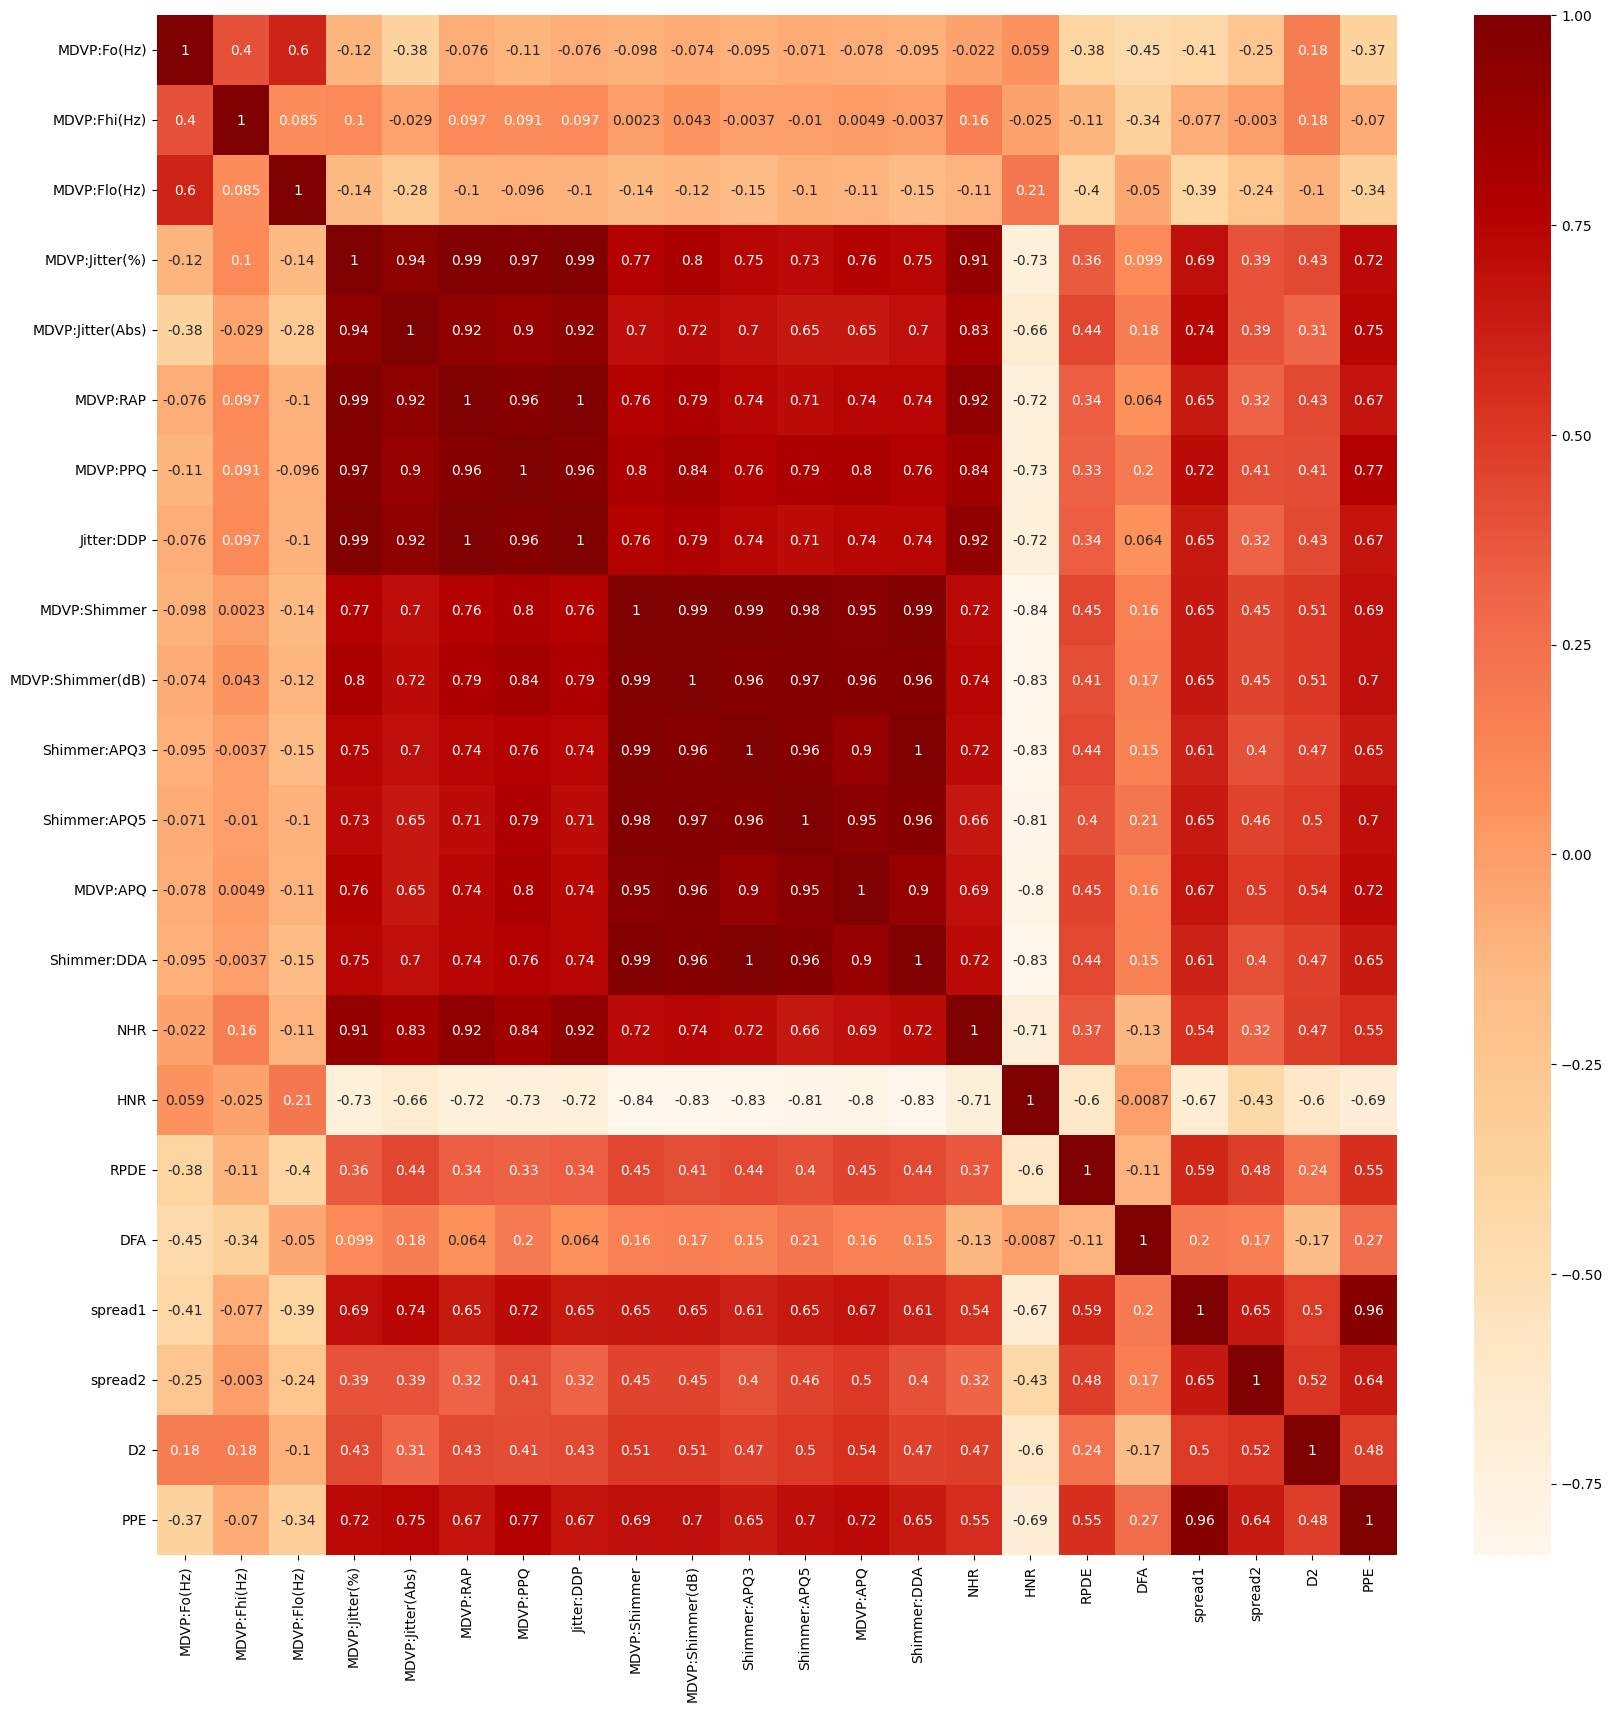

In [15]:
correl=df.drop(columns='status').corr()
plt.figure(figsize=(20,20))
sns.heatmap(correl,annot=True,cmap='OrRd')
plt.show()

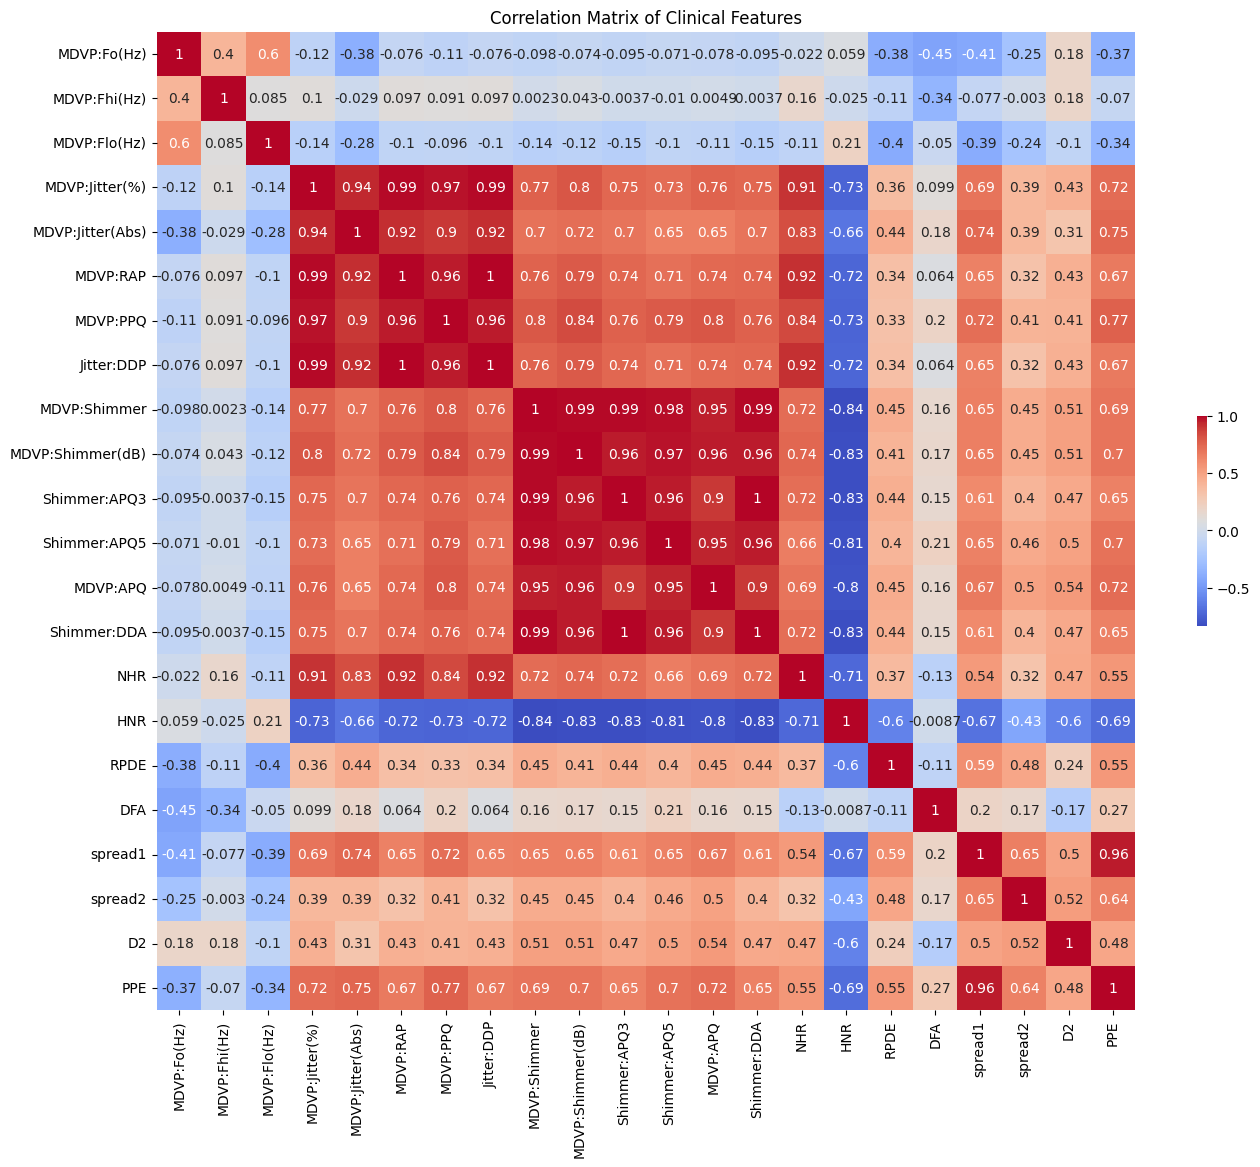

In [37]:
plt.figure(figsize=(14, 12))
sns.heatmap(correl, annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': .2})
plt.title("Correlation Matrix of Clinical Features")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()


# Build model

## Split data

In [16]:
X = df.drop(columns='status')
y=df['status']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(156, 22)
(156,)
(39, 22)
(39,)


In [18]:
# Scale Data Using StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Baseline model

In [19]:
# Accuracy Of the model if we predict only max target
score_baseline = y.value_counts(normalize=True).max()
score_baseline

0.7538461538461538

## LogisticRegression

In [20]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_preds = logistic_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_preds))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



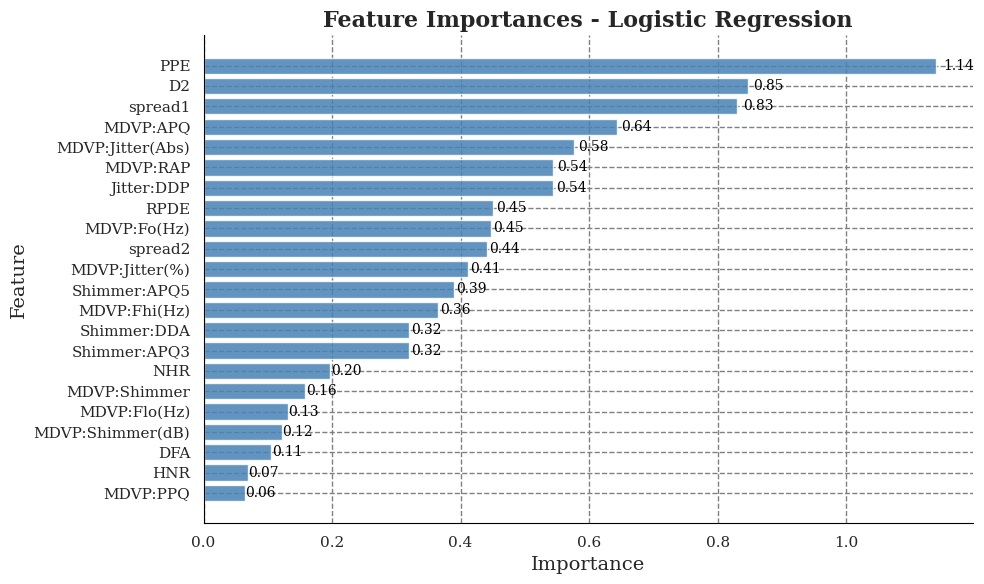

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate feature importances from Logistic Regression coefficients
logistic_importances = np.abs(logistic_model.coef_).mean(axis=0)
sorted_indices = np.argsort(logistic_importances)
features_sorted = np.array(X.columns)[sorted_indices]
importances_sorted = logistic_importances[sorted_indices]

# Update matplotlib rcParams for a cleaner, publication-quality style
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.edgecolor": "black",
    "axes.linewidth": 0.8,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "figure.figsize": (10, 6),
})

fig, ax = plt.subplots()

# Create a horizontal bar plot with a refined color and opacity
bars = ax.barh(features_sorted, importances_sorted, color='steelblue', alpha=0.85)

# Annotate bars with their respective importance values
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.01 * width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',
            va='center', fontsize=10, color='black')

# Set title and axis labels with enhanced font sizes
ax.set_title("Feature Importances - Logistic Regression", fontsize=16, fontweight='bold')
ax.set_xlabel("Importance", fontsize=14)
ax.set_ylabel("Feature", fontsize=14)

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("logistic_importance_cvpr.png", dpi=300)
plt.show()


# K-Nearest Neighbors (KNN)


In [22]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_preds))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39



# Decision Tree


In [23]:
tree_model = DecisionTreeClassifier(random_state=42,max_depth=4)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, tree_preds))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.71      0.50         7
           1       0.92      0.75      0.83        32

    accuracy                           0.74        39
   macro avg       0.65      0.73      0.66        39
weighted avg       0.83      0.74      0.77        39



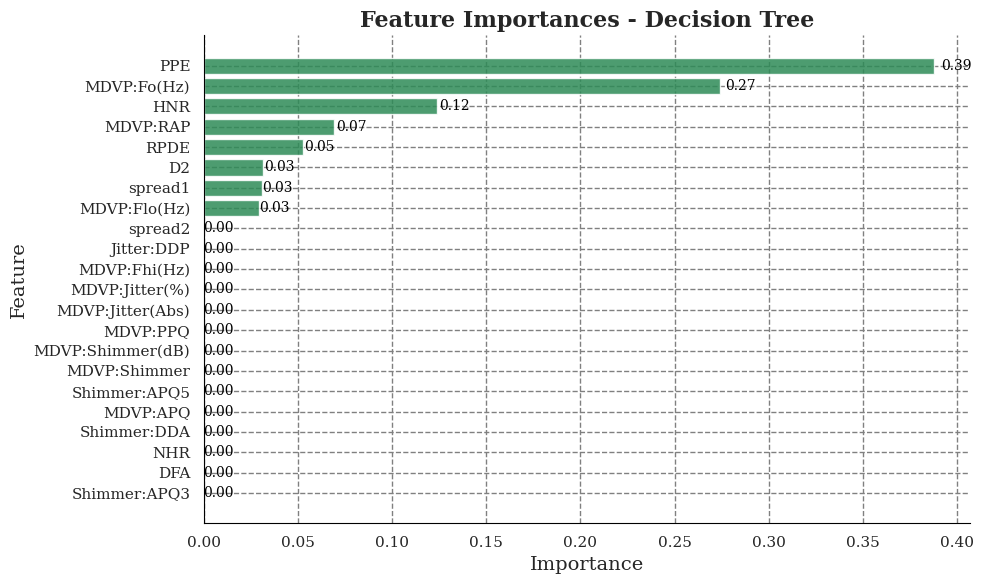

In [51]:
# Calculate Decision Tree feature importances
tree_importances = tree_model.feature_importances_
sorted_indices = np.argsort(tree_importances)
features_sorted = np.array(X.columns)[sorted_indices]
importances_sorted = tree_importances[sorted_indices]

# Update matplotlib rcParams for a cleaner, publication-quality style
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.edgecolor": "black",
    "axes.linewidth": 0.8,
    "grid.linestyle": "--",
    "grid.color": "gray",
    "figure.figsize": (10, 6),
})

fig, ax = plt.subplots()

# Create a horizontal bar plot with refined color and opacity
bars = ax.barh(features_sorted, importances_sorted, color='seagreen', alpha=0.85)

# Annotate each bar with its importance value
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.01 * width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',
            va='center', fontsize=10, color='black')

# Set title and axis labels with enhanced font sizes
ax.set_title("Feature Importances - Decision Tree", fontsize=16, fontweight='bold')
ax.set_xlabel("Importance", fontsize=14)
ax.set_ylabel("Feature", fontsize=14)

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("tree_importance_cvpr.png", dpi=300)
plt.show()

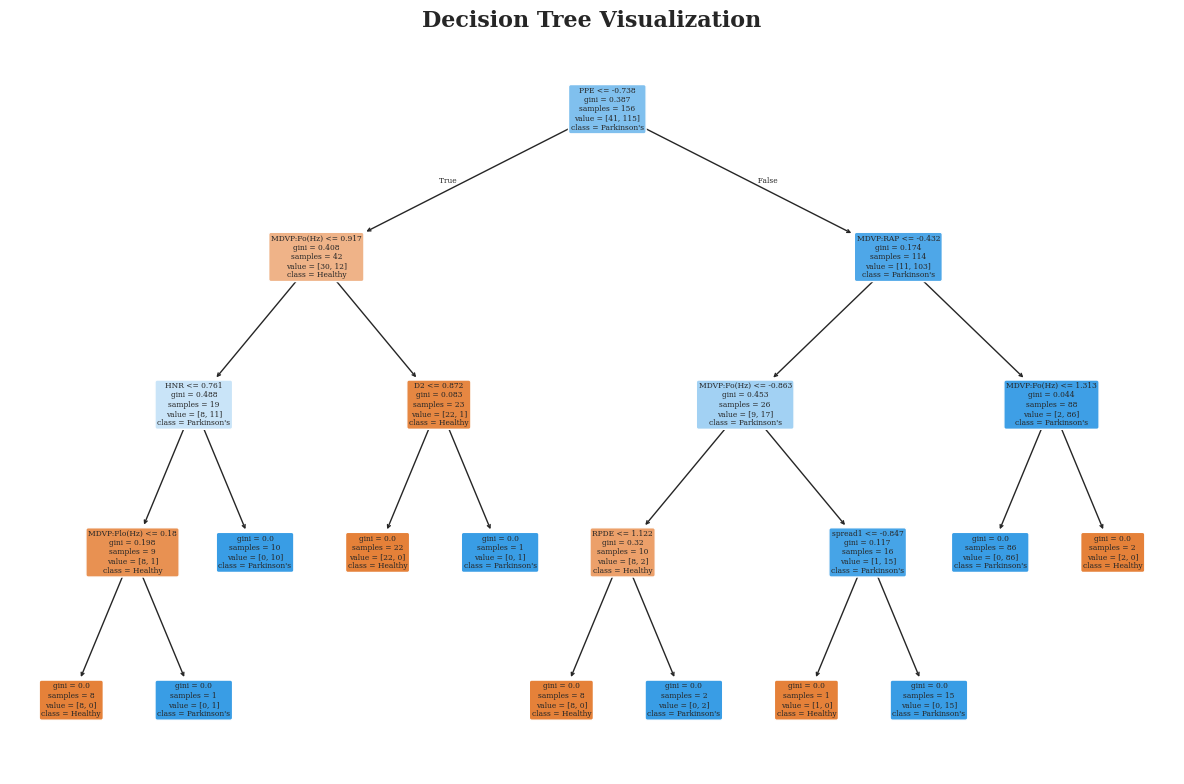

In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Update matplotlib rcParams for a clean, publication-ready style
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.edgecolor": "black",
    "axes.linewidth": 0.8,
})

fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(tree_model,
          feature_names=X.columns,
          class_names=["Healthy", "Parkinson's"],  # Adjust class names as needed
          filled=True,
          rounded=True,
          ax=ax)

ax.set_title("Decision Tree Visualization", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("decision_tree_visualization_cvpr.png", dpi=300)
plt.show()


## Assemble model predictions

In [26]:
# Combine predictions using majority voting
combined_preds = []
for i in range(len(logistic_preds)):
    # Count the occurrences of each class (0 or 1)
    votes = [logistic_preds[i], tree_preds[i], knn_preds[i]]
    vote_count = {0: 0, 1: 0}
    for vote in votes:
        vote_count[vote] += 1

    # Take the class with the majority vote
    combined_preds.append(0 if vote_count[0] > vote_count[1] else 1)

## Prediction VS Actual

In [27]:
comparison = pd.DataFrame({'Actual':y_test,'Logistic Regression':logistic_preds,'Decision Tree':tree_preds,'KNN':knn_preds,'Assemble Models':combined_preds})
comparison['Base Model Prediction'] = 1

In [28]:
comparison

,Actual,Logistic Regression,Decision Tree,KNN,Assemble Models,Base Model Prediction
138,1,1,1,1,1,1
16,1,1,1,1,1,1
155,1,1,1,1,1,1
96,1,1,1,1,1,1
68,1,1,1,1,1,1
153,1,1,1,1,1,1
55,1,1,1,1,1,1
15,1,1,1,1,1,1
112,1,1,1,1,1,1
111,1,1,0,1,1,1


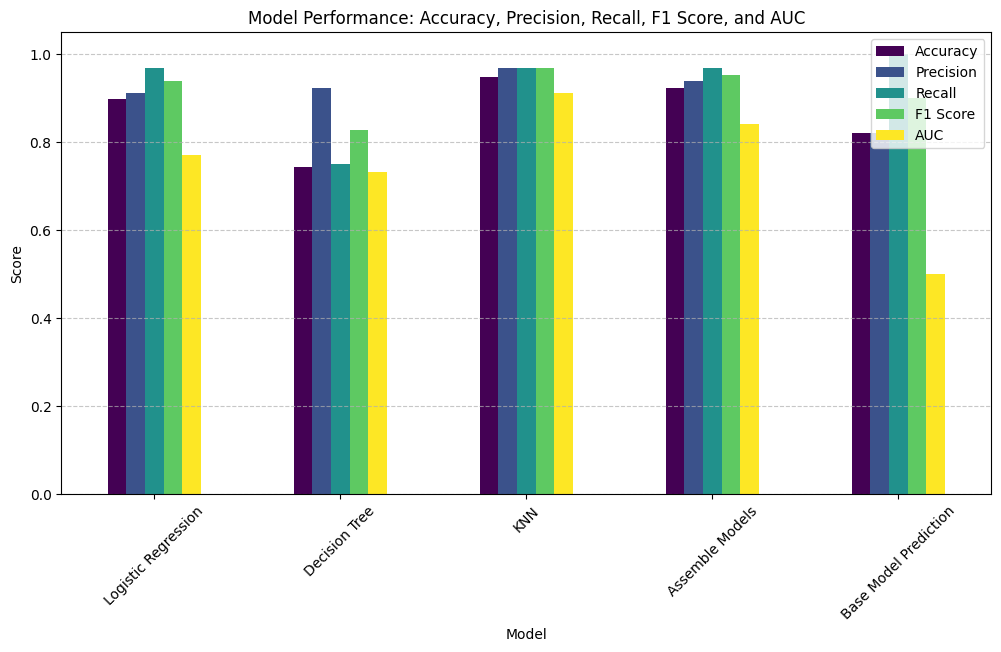

In [29]:
def calculate_metrics(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    auc = roc_auc_score(actual, predicted)
    return accuracy, precision, recall, f1, auc

models = ["Logistic Regression", "Decision Tree", "KNN", "Assemble Models", "Base Model Prediction"]
metrics = {model: calculate_metrics(comparison["Actual"], comparison[model]) for model in models}
metrics_df = pd.DataFrame(metrics, index=["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]).T
metrics_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Performance: Accuracy, Precision, Recall, F1 Score, and AUC")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

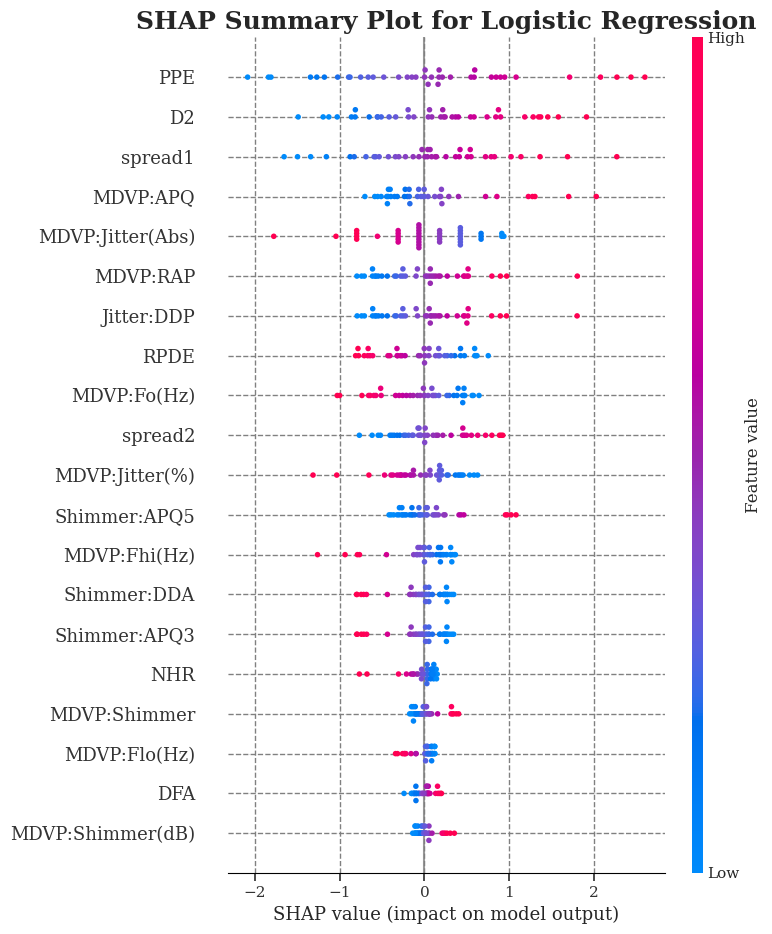

In [56]:
import shap
import matplotlib.pyplot as plt

# Create the SHAP explainer and compute SHAP values
explainer = shap.Explainer(logistic_model, X_train)
shap_values = explainer(X_test)

# Create a larger figure before calling the SHAP summary plot
plt.figure(figsize=(12, 8))

# Generate the SHAP summary plot (set show=False to allow further customization)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)

# Enhance the plot title with larger, bold font
plt.title("SHAP Summary Plot for Logistic Regression", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.savefig("shap_summary_plot_cvpr.png", dpi=300)
plt.show()


  0%|          | 0/39 [00:00<?, ?it/s]

<Figure size 1200x800 with 0 Axes>

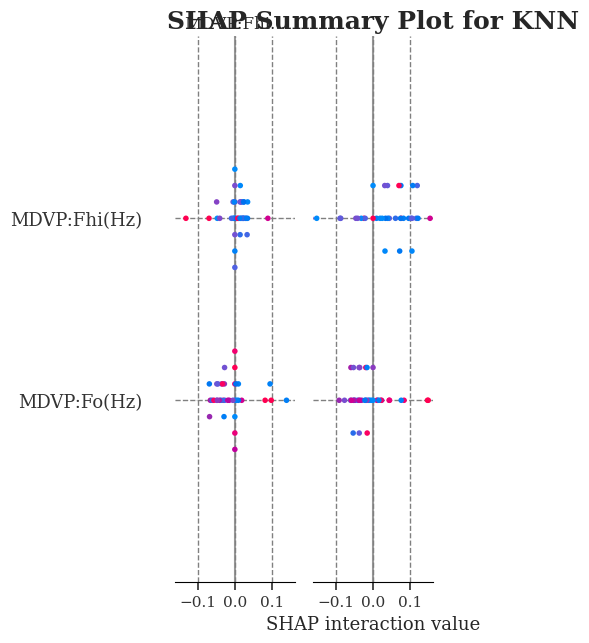

In [60]:
import shap
import matplotlib.pyplot as plt

# Define a prediction function (ensure it returns probabilities if needed)
predict_fn = lambda x: knn_model.predict_proba(x)

# Create the KernelExplainer for KNN and compute SHAP values (using a subset for performance)
explainer_knn = shap.KernelExplainer(predict_fn, X_train)
shap_values_knn = explainer_knn.shap_values(X_test, nsamples=100)

# Create a larger figure for the summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_knn, X_test, feature_names=X.columns, show=False)

# Enhance the plot title with larger, bold font
plt.title("SHAP Summary Plot for KNN", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig("shap_summary_knn_cvpr.png", dpi=300)
plt.show()


<Figure size 1200x800 with 0 Axes>

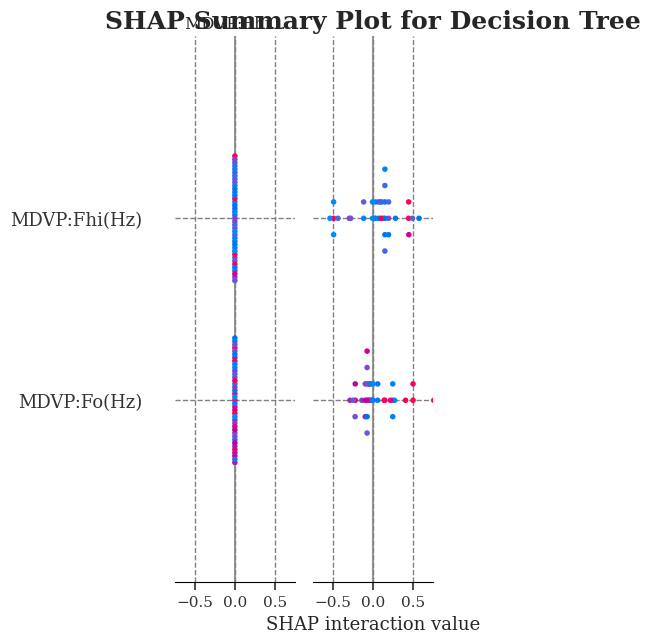

In [57]:
import shap
import matplotlib.pyplot as plt

# Create the SHAP explainer for the decision tree and compute SHAP values
explainer_tree = shap.TreeExplainer(tree_model)
shap_values_tree = explainer_tree.shap_values(X_test)

# Create a larger figure for the summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_tree, X_test, feature_names=X.columns, show=False)

# Enhance the plot title with larger, bold font
plt.title("SHAP Summary Plot for Decision Tree", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig("shap_summary_tree_cvpr.png", dpi=300)
plt.show()
